In [1]:
import matplotlib.pyplot as plt
import cv2
import warnings
warnings.filterwarnings('ignore')
import numpy as np

In [2]:
camel_1_img=cv2.imread('Horses_Camels/train/camel/1.png')

In [3]:
camel_1_img=cv2.cvtColor(camel_1_img,cv2.COLOR_BGR2RGB)

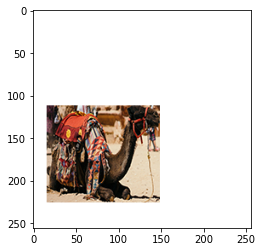

In [4]:
plt.imshow(camel_1_img)

In [5]:
camel_1_img.shape

(256, 256, 3)

In [6]:
horse_1_img=cv2.imread('Horses_Camels/train/horse/1.png')

In [7]:
horse_1_img=cv2.cvtColor(horse_1_img,cv2.COLOR_BGR2RGB)

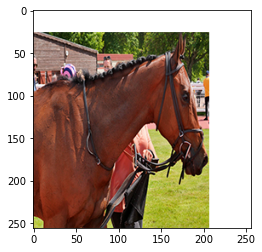

In [8]:
plt.imshow(horse_1_img)

In [9]:
horse_1_img.shape

(256, 256, 3)

In [10]:
from keras.preprocessing.image import ImageDataGenerator

In [11]:
image_generator=ImageDataGenerator(rotation_range=30,width_shift_range=0.1,height_shift_range=0.1,rescale=1/255,shear_range=0.2,
                                   zoom_range=0.20,horizontal_flip=True,fill_mode='nearest')

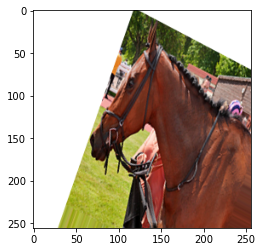

In [12]:
plt.imshow(image_generator.random_transform(horse_1_img))

In [13]:
image_generator.flow_from_directory('Horses_Camels/train')

Found 360 images belonging to 2 classes.


In [14]:
from keras.models import Sequential
from keras.layers import Activation,Dropout,Flatten,Conv2D,MaxPooling2D,Dense

In [15]:
model=Sequential()
#convolutional layer
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
#pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#2D->1D
model.add(Flatten())

#Dense layer
model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

In [16]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [18]:
#train the model
input_shape=(150,150,3)

In [19]:
batch_size=32
train_image_generator=image_generator.flow_from_directory('Horses_Camels/train',target_size=input_shape[:2],batch_size=batch_size,
                                                         class_mode='binary')

Found 360 images belonging to 2 classes.


In [20]:
test_image_generator=image_generator.flow_from_directory('Horses_Camels/test',target_size=input_shape[:2],batch_size=batch_size,
                                                         class_mode='binary')

Found 40 images belonging to 2 classes.


In [21]:
import math
def calculate(n):
    return int(math.ceil((1. * n) / batch_size)) 

steps_per_epoch = calculate(train_image_generator.n)
print('steps_per_epoch ',steps_per_epoch)
validation_steps = calculate(test_image_generator.n)
print('validation_steps ',validation_steps)

steps_per_epoch  12
validation_steps  2


In [22]:
train_image_generator.class_indices

{'camel': 0, 'horse': 1}

In [25]:
results=model.fit(train_image_generator,epochs=25,steps_per_epoch=steps_per_epoch,validation_data=test_image_generator,
                           validation_steps=validation_steps)

Epoch 1/25
12/12 [==============================] - 7s 546ms/step - loss: 0.9594 - accuracy: 0.5232 - val_loss: 0.6948 - val_accuracy: 0.5000
Epoch 2/25
12/12 [==============================] - 6s 463ms/step - loss: 0.6877 - accuracy: 0.5577 - val_loss: 0.6675 - val_accuracy: 0.5500
Epoch 3/25
12/12 [==============================] - 7s 589ms/step - loss: 0.6540 - accuracy: 0.6120 - val_loss: 0.7026 - val_accuracy: 0.5750
Epoch 4/25
12/12 [==============================] - 7s 590ms/step - loss: 0.6251 - accuracy: 0.6271 - val_loss: 0.6096 - val_accuracy: 0.7250
Epoch 5/25
12/12 [==============================] - 7s 596ms/step - loss: 0.6149 - accuracy: 0.6886 - val_loss: 0.5846 - val_accuracy: 0.7000
Epoch 6/25
12/12 [==============================] - 7s 584ms/step - loss: 0.5789 - accuracy: 0.6649 - val_loss: 0.6624 - val_accuracy: 0.6500
Epoch 7/25
12/12 [==============================] - 8s 623ms/step - loss: 0.5536 - accuracy: 0.7505 - val_loss: 0.5874 - val_accuracy: 0.6750
Epoch 

In [26]:
model.save('horses_camels_model.h5')

In [27]:
results.history['accuracy']

[0.5222222208976746,
 0.5555555820465088,
 0.6083333492279053,
 0.6611111164093018,
 0.6861110925674438,
 0.7194444537162781,
 0.730555534362793,
 0.75,
 0.7638888955116272,
 0.7777777910232544,
 0.7833333611488342,
 0.7527777552604675,
 0.7888888716697693,
 0.800000011920929,
 0.7972221970558167,
 0.8027777671813965,
 0.7777777910232544,
 0.800000011920929,
 0.7777777910232544,
 0.8027777671813965,
 0.8361111283302307,
 0.8055555820465088,
 0.8277778029441833,
 0.8111110925674438,
 0.8305555582046509]

Text(0.5, 0, 'Epoch')

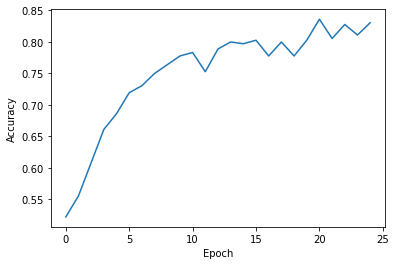

In [40]:
plt.plot(results.history['accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

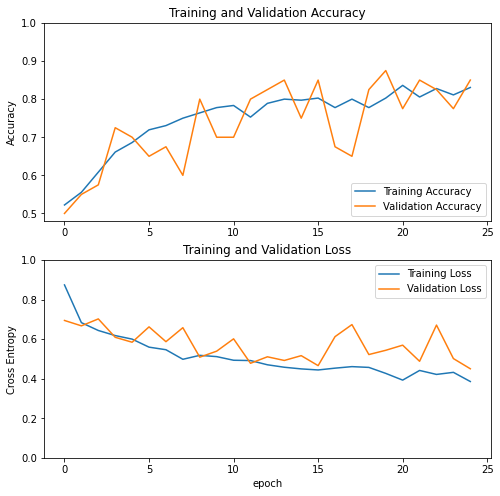

In [42]:
acc = results.history['accuracy']
val_acc = results.history['val_accuracy']

loss = results.history['loss']
val_loss = results.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [30]:
predictions = model.predict(x=test_image_generator,batch_size=10,verbose=0)  

In [31]:
for i in predictions:
    print(i)

[0.85672617]
[0.5869553]
[0.08236262]
[0.5532323]
[0.26846516]
[0.29085392]
[0.36603504]
[0.99999344]
[0.8728546]
[0.3147114]
[0.41580984]
[0.7400701]
[0.26412183]
[0.99908876]
[0.9809681]
[0.28135258]
[0.23619041]
[0.92167574]
[0.9900553]
[0.38772938]
[0.16258124]
[0.09933445]
[0.17186987]
[0.09321579]
[0.92713404]
[0.9719367]
[0.46887058]
[0.9498606]
[0.76423985]
[0.5766188]
[0.9825187]
[0.87477416]
[0.97911334]
[0.7498447]
[0.37057012]
[0.95467424]
[0.24156523]
[0.05972797]
[0.72638553]
[0.19943285]


In [32]:
train_image_generator.class_indices

{'camel': 0, 'horse': 1}

In [33]:
import numpy as np
from keras.preprocessing import image

horse_img_10 = 'Horses_Camels/train/horse/10.png'
horse_img = image.load_img(horse_img_10, target_size=(150, 150))
horse_img = image.img_to_array(horse_img)
horse_img = np.expand_dims(horse_img, axis=0)
horse_img = horse_img/255
prediction_prob_horse = model.predict(horse_img)
print(f'Probability that image is a horse is: {prediction_prob_horse}')

Probability that image is a horse is: [[0.9487771]]


In [34]:
camel_img_10 = 'Horses_Camels/train/camel/10.png'
camel_img = image.load_img(camel_img_10, target_size=(150, 150))
camel_img = image.img_to_array(camel_img)
camel_img = np.expand_dims(camel_img, axis=0)
camel_img = camel_img/255
prediction_prob_camel = model.predict(camel_img)
print(f'Probability that image is a camel is: {prediction_prob_camel}')

Probability that image is a camel is: [[0.23479459]]


In [35]:
from sklearn.metrics import classification_report

In [36]:
from sklearn.metrics import confusion_matrix
import itertools

In [37]:
Y_pred = model.predict_generator(test_image_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_image_generator.classes, y_pred))
print('Classification Report')
target_names = ['Horse', 'Camel']
print(classification_report(test_image_generator.classes, y_pred, target_names=target_names))

Confusion Matrix
[[20  0]
 [20  0]]
Classification Report
              precision    recall  f1-score   support

       Horse       0.50      1.00      0.67        20
       Camel       0.00      0.00      0.00        20

    accuracy                           0.50        40
   macro avg       0.25      0.50      0.33        40
weighted avg       0.25      0.50      0.33        40



In [38]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.50      1.00      0.67        20
           1       0.00      0.00      0.00        20

    accuracy                           0.50        40
   macro avg       0.25      0.50      0.33        40
weighted avg       0.25      0.50      0.33        40

Confusion matrix, without normalization
[[20  0]
 [20  0]]


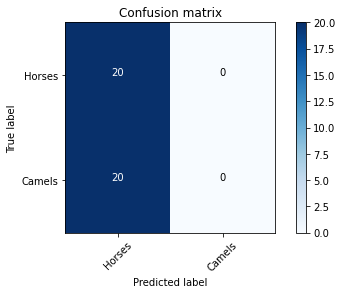

In [39]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(test_image_generator.classes, y_pred)
np.set_printoptions(precision=2)

print (classification_report(test_image_generator.classes, y_pred))

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Horses','Camels'],normalize= False,  title='Confusion matrix')

Dataset:https://www.kaggle.com/akrsnv/horses-and-camels